I understand Indians are most prone to Diabetes.Genetics,Lifestye and Food Habits can be attributed to it.I will be exploring the dataset and predicting Diabetes Paatients based on Body Parametes.Here I will demonstrate data exploration and how to build a neural network.This kernel is a work in Process.If you like it please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


### Importing Python Modules

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### The details of Features are as follows: 

1.Pregnancies: Number of times Pregnant

2.Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3.Blood Pressure: Diastolic blood pressure (mm Hg) 

4.Skin Thickness: Triceps skin fold thickness (mm)

5.Insulin: 2-Hour serum insulin (mu U/ml)

6.BMI: Body mass index (weight in kg/(height in m)^2)

7.Diabetes Pedigree Function: Diabetes pedigree function

8.Age: Age (years)


### Misssing Values

In [4]:
#There are 0 values in the dataset in the Glucose,BloodPressure,SkinThickness, Insulin and BMI, we need to replace them with the NAN 

df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
#Replacing the null values with the mean and median respectively

df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

### Histogram

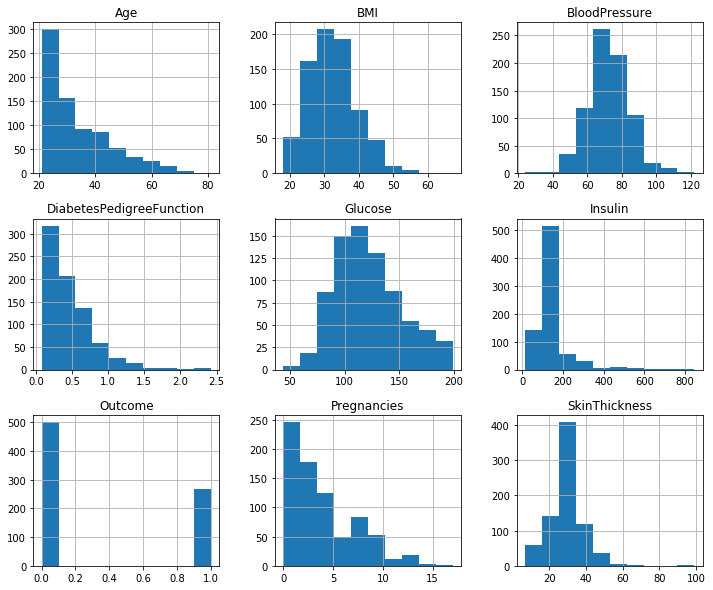

In [8]:
df.hist(figsize=(12,10));

Above plot shows the distribution of all the features in the datset.Most of them dont have a normal distribution.Later we may use feature scaling to overcome this problem.

### Pair Plot

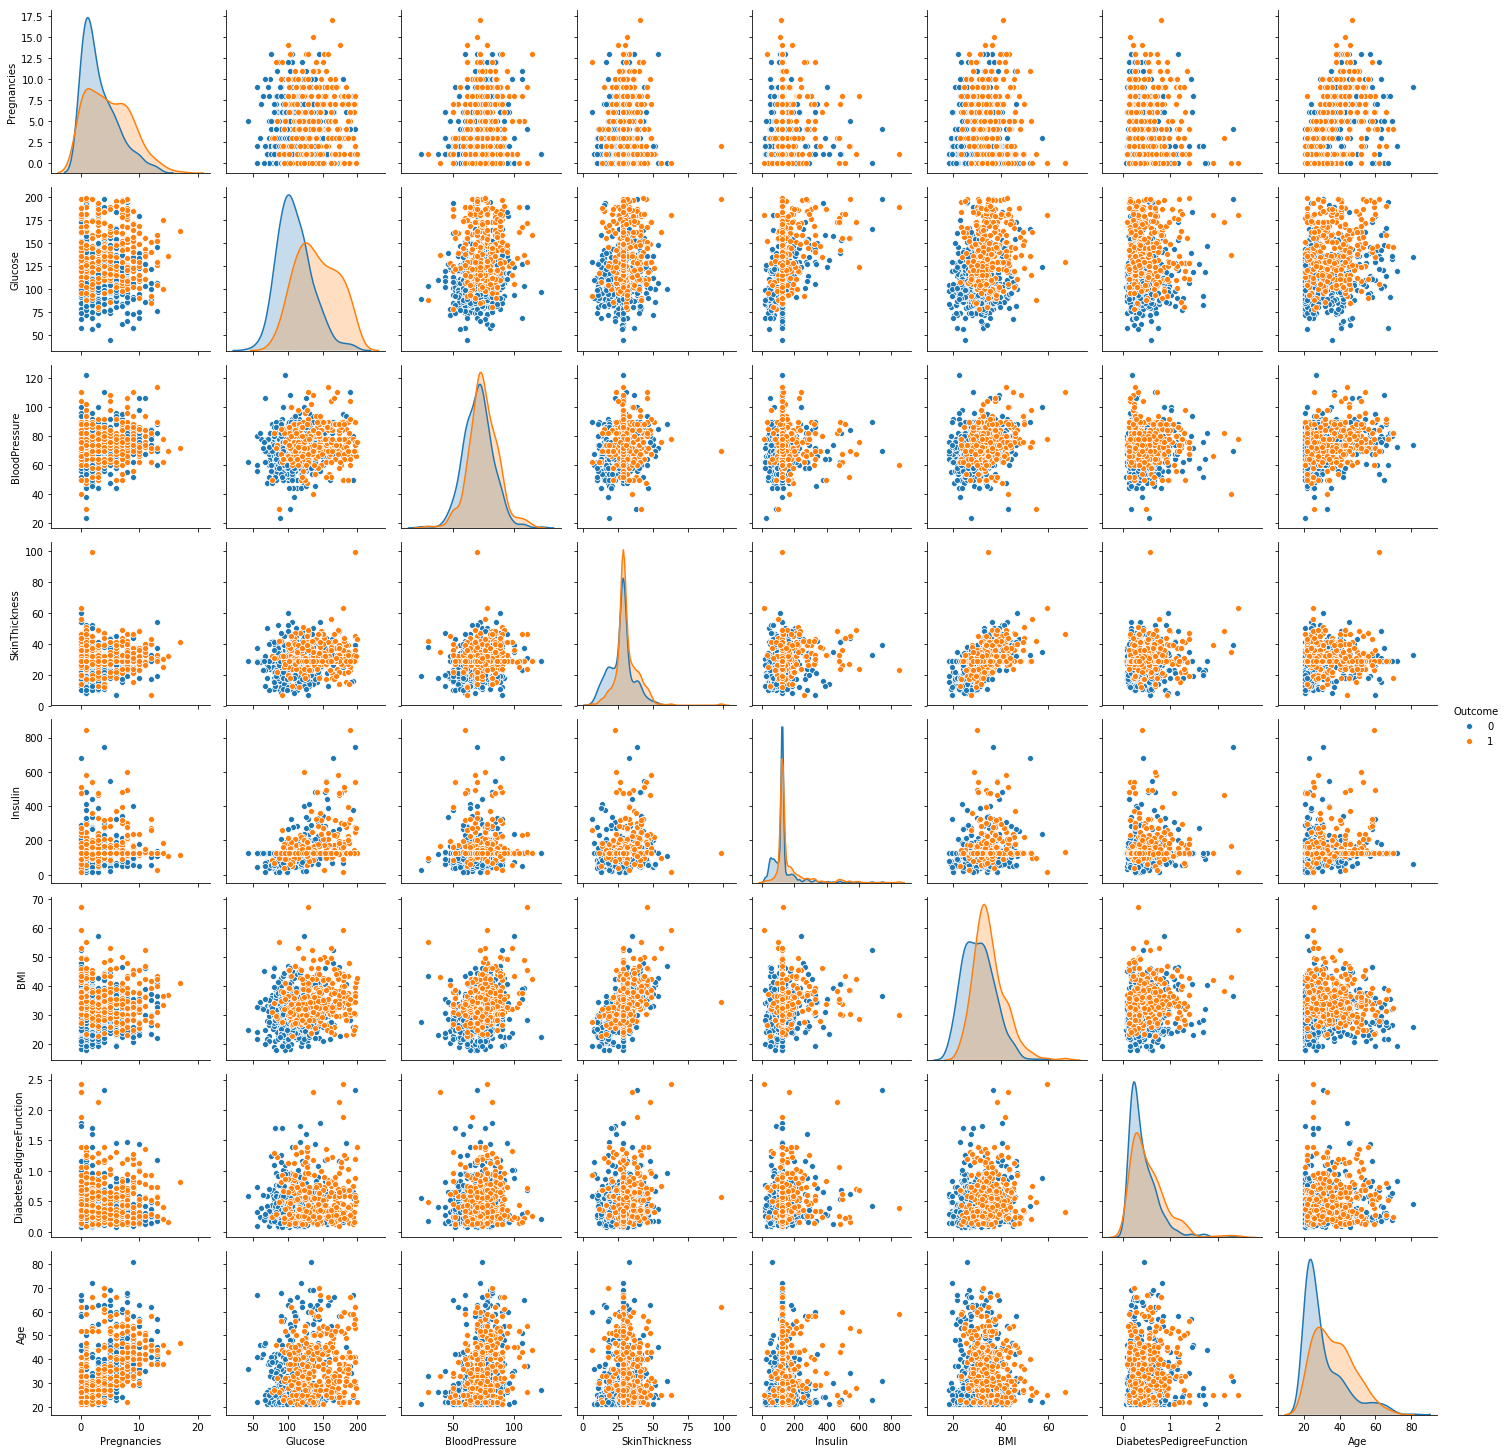

In [9]:
import seaborn as sns
sns.pairplot(df,hue='Outcome')

From the pair plot we can see that there is no clear seperation for the data.So it will not be easy to predict he Diabetes patients.

### Correlations

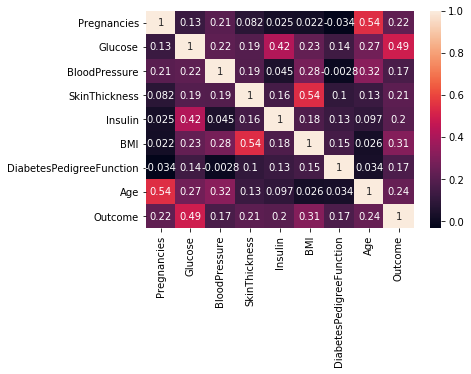

In [10]:
sns.heatmap(df.corr(),annot = True);

So we can see that Age and Number of Pregancy has high correlation.This is obvious as older people have had more chance of being pregnant.

Glucose and Diabetics has high correlation.People with higher glucose level are generally diabetic.

### Exploring the Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


So we have 786 entries in the dataset.Features have all numerical values.

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


So the features have high variance.We need to scake the data for better model prediction.

### Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler 
from keras.utils import to_categorical

Using TensorFlow backend.


In [14]:
sc = StandardScaler()
X = sc.fit_transform(df.drop('Outcome',axis=1))
y = df['Outcome'].values
y_cat = to_categorical(y)

Standard scaler considerd the mean and standard deviation value to make the calculation.Mean value is subtracted from each value and then divided by the standard deviation.So the features will be scaled to mean of Zero and with a standard deviation of one.

In [15]:
#X

In [16]:
X.shape

(768, 8)

In [17]:
#y_cat

### Building the Neural Network

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_cat,random_state=22,test_size=0.2)

In [19]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam

In [20]:
model = Sequential()
model.add(Dense(32,input_shape=(8,),activation ='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(Adam(lr=0.05),loss='categorical_crossentropy',metrics=['accuracy'])

So our Neural network has 2 layers with 8 input features,32 nodes,relu as activation function,Output layer has two nodes to predict he categorical values,Softmax as the output function,Adam optimizer,Loss as categorical cross entropy and metrics of measurnment as accuracy.

In [21]:
model.fit(X_train,y_train,epochs=20,verbose=2,validation_split=0.1)

Train on 552 samples, validate on 62 samples
Epoch 1/20
 - 0s - loss: 0.5677 - accuracy: 0.6902 - val_loss: 0.4368 - val_accuracy: 0.8065
Epoch 2/20
 - 0s - loss: 0.4851 - accuracy: 0.7790 - val_loss: 0.4068 - val_accuracy: 0.8065
Epoch 3/20
 - 0s - loss: 0.4449 - accuracy: 0.8007 - val_loss: 0.4097 - val_accuracy: 0.7903
Epoch 4/20
 - 0s - loss: 0.4298 - accuracy: 0.7754 - val_loss: 0.4265 - val_accuracy: 0.7581
Epoch 5/20
 - 0s - loss: 0.4506 - accuracy: 0.7826 - val_loss: 0.3914 - val_accuracy: 0.8065
Epoch 6/20
 - 0s - loss: 0.4619 - accuracy: 0.7826 - val_loss: 0.4407 - val_accuracy: 0.7742
Epoch 7/20
 - 0s - loss: 0.4394 - accuracy: 0.7935 - val_loss: 0.4379 - val_accuracy: 0.7742
Epoch 8/20
 - 0s - loss: 0.4283 - accuracy: 0.8062 - val_loss: 0.4231 - val_accuracy: 0.7903
Epoch 9/20
 - 0s - loss: 0.4177 - accuracy: 0.8043 - val_loss: 0.4760 - val_accuracy: 0.8065
Epoch 10/20
 - 0s - loss: 0.4032 - accuracy: 0.8025 - val_loss: 0.4805 - val_accuracy: 0.7903
Epoch 11/20
 - 0s - loss

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 2,466
Trainable params: 2,466
Non-trainable params: 0
_________________________________________________________________


### Calulation of parameters for each layer
32*8 + 32 = 288

32*32 + 32 = 1056

32*2 + 2 = 66

In [23]:
y_pred = model.predict(X_test)

y_pred is gives us the probability values.We have to convert them to binary class using argmax functionas shown below.

In [24]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

### Evaluating Model Performance

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### Accuracy

In [26]:
print('Accuracy of model is:',accuracy_score(y_test_class,y_pred_class))

Accuracy of model is: 0.7077922077922078


#### Classification report

In [27]:
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       100
           1       0.58      0.57      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



#### Confusion matrix

We can see that the Precision and Recall are no for 1 ie Diabetes prediction.We can improve this by further optimizing out model or by increasing the data.Here we have small set of data.So this kernel is just a demonstration of how to build a neural network to predict Diabetes.

In [28]:
confusion_matrix(y_test_class,y_pred_class)

array([[78, 22],
       [23, 31]])

### Making Sense of Our model

In [29]:
pd.Series(y_test_class).value_counts()

0    100
1     54
dtype: int64

In [30]:
pd.Series(y_test_class).value_counts()/len(y_test_class)

0    0.649351
1    0.350649
dtype: float64

So in our data 64.9 % of the patients dont have diabetes.So without building a machine learning model if we were to categorise out patients 100 % as no diabetic we would be accurate 64.9 % of the times.Our model accuracy is 72% so we are better than the worst case.

### Benchmarking Deep Learning with Machine Learning Algorithms

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for mod in [RandomForestClassifier(),SVC(),GaussianNB()]:
    mod.fit(X_train,y_train[:,1])
    y_pred = mod.predict(X_test)
    print("="*80)
    print(mod)
    print("_"*80)
    print("Accuracy score:{:0.3}".format(accuracy_score(y_test_class,y_pred)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_class,y_pred))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
________________________________________________________________________________
Accuracy score:0.721
Confusion Matrix:
[[89 11]
 [32 22]]
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
________________________________________________________________

So we can see the accuracy level with Random Forest,SVM and Gaussian Naive Bayes are not better than the result obtained by machine learning.

### Which Features are More Important to Predict Diabetes

In [32]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=df[df.columns[:8]]
Y=df['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.249936
BMI                         0.167015
Age                         0.136222
DiabetesPedigreeFunction    0.116371
Insulin                     0.089548
BloodPressure               0.084363
Pregnancies                 0.082248
SkinThickness               0.074297
dtype: float64

We can see that Glucose content in the blood is the major indicator of diabetes in a patient followed by Body Mass Index and Age.